# Lending Club Case Study
### Problem statement
##### connsumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
#### Objective
- Find driving factors behing loan default

## 1. Data Understanding

In [1405]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [1406]:
loan = pd.read_csv("~/Downloads/loan.csv",low_memory=False)
loan.shape

(39717, 111)

In [1407]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


### 1.1 Generic functions to be reused for data understanding

In [1408]:
#function to check the percentage of null columns
def printAllNullColumns(dataFrame):
    # Calculate the percentage of null values for each column
    null_percentage = dataFrame.isnull().sum() / len(dataFrame.index) * 100
    
    # Filter and print only the columns where the percentage of null values is 100%
    for column, percentage in null_percentage.items():
        if percentage == 100:
            print(f"Column '{column}' has {percentage}% null values")

In [1409]:
def printAllColumns(dataFrame):
    # Calculate the percentage of null values for each column
    null_percentage = dataFrame.isnull().sum() / len(dataFrame.index) * 100
    
    # Sort the columns by the percentage of null values in descending order
    sorted_null_percentage = null_percentage.sort_values(ascending=False)
    
    # Print the columns and their null percentage
    for column, percentage in sorted_null_percentage.items():
        print(f"Column '{column}' has {percentage:.2f}% null values")

In [1410]:
def printColumnsWillNullValues(dataFrame):
    # Calculate the percentage of null values for each column
    null_percentage = dataFrame.isnull().sum() / len(dataFrame.index) * 100
    
    # Sort the columns by the percentage of null values in descending order
    sorted_null_percentage = null_percentage.sort_values(ascending=False)
    
    # Print the columns and their null percentage
    for column, percentage in sorted_null_percentage.items():
        if percentage > 0:
            print(f"Column '{column}' has {percentage}% null values")

In [1411]:
def printColumnsNullValues(dataFrame, columns_of_interest=None):
    # If columns_of_interest is not specified, use all columns
    if columns_of_interest is None:
        columns_of_interest = dataFrame.columns
    
    # Calculate the percentage of null values for specified columns
    null_percentage = dataFrame[columns_of_interest].isnull().sum() / len(dataFrame.index) * 100
    
    # Sort the columns by the percentage of null values in descending order
    sorted_null_percentage = null_percentage.sort_values(ascending=False)
    
    # Print the columns and their null percentage
    for column, percentage in sorted_null_percentage.items():
            print(f"Column '{column}' has {percentage}% null values")

In [1412]:
def printColumn(col, dataFrame, message=""):
    """
    Prints the first few rows of a specified column from the DataFrame without the column name and with a custom message.

    Parameters:
    - col: The column to print.
    - dataFrame: The DataFrame containing the data.
    - message: A custom message to print before the data.
    """
    columns_to_print = [col]
    if message:
        print(message)
    for value in dataFrame[columns_to_print].head()[col]:
        print(value)


In [1413]:
def generate_metadata_description(dataFrame):
    """
    Generate a metadata description for the DataFrame.

    Parameters:
    - dataFrame: DataFrame for which metadata description is to be generated.
    """
    print("Metadata Description:")
    print("Total number of rows:", len(dataFrame))
    print("Total number of columns:", len(dataFrame.columns))
    print("\nColumn-wise Description:")
    for column in dataFrame.columns:
        print("Column:", column)
        print(" - Data Type:", dataFrame[column].dtype)
        print(" - Unique Values:", dataFrame[column].nunique())
        print(" - Null Values:", dataFrame[column].isnull().sum())
        # Add more details as needed, such as data distribution statistics or categorical values.
        print()

In [1414]:
def ColumnProperties(dataFrame):
    # Initialize the DataFrame with column names and their data types
    columnProperties = pd.DataFrame(dataFrame.dtypes, columns=['dataType'])
    
    # Reset the index to convert index to a column
    columnProperties.reset_index(inplace=True)
    
    # Rename the index column to 'colName'
    columnProperties.rename(columns={'index': 'Name'}, inplace=True)
    
    # Calculate the number of missing values for each column
    columnProperties['NumberOfMissingValues'] = dataFrame.isnull().sum().values
    
    # Calculate the number of unique values for each column
    columnProperties['NumberOfUniqueValues'] = dataFrame.nunique().values
    
    # Calculate the most frequent value (mode) for each column
    columnProperties['MaxValue'] = dataFrame.mode().iloc[0]
    
    # Return the DataFrame with the overview
    return columnProperties

### 1.2 Understanding metadata of the data

In [1415]:
generate_metadata_description(loan)

Metadata Description:
Total number of rows: 39717
Total number of columns: 111

Column-wise Description:
Column: id
 - Data Type: int64
 - Unique Values: 39717
 - Null Values: 0

Column: member_id
 - Data Type: int64
 - Unique Values: 39717
 - Null Values: 0

Column: loan_amnt
 - Data Type: int64
 - Unique Values: 885
 - Null Values: 0

Column: funded_amnt
 - Data Type: int64
 - Unique Values: 1041
 - Null Values: 0

Column: funded_amnt_inv
 - Data Type: float64
 - Unique Values: 8205
 - Null Values: 0

Column: term
 - Data Type: object
 - Unique Values: 2
 - Null Values: 0

Column: int_rate
 - Data Type: object
 - Unique Values: 371
 - Null Values: 0

Column: installment
 - Data Type: float64
 - Unique Values: 15383
 - Null Values: 0

Column: grade
 - Data Type: object
 - Unique Values: 7
 - Null Values: 0

Column: sub_grade
 - Data Type: object
 - Unique Values: 35
 - Null Values: 0

Column: emp_title
 - Data Type: object
 - Unique Values: 28820
 - Null Values: 2459

Column: emp_leng

### 1.3 Check null percentage of all columns

In [1416]:
# checking the null percentage of columns in loan
printAllNullColumns(loan)

Column 'mths_since_last_major_derog' has 100.0% null values
Column 'annual_inc_joint' has 100.0% null values
Column 'dti_joint' has 100.0% null values
Column 'verification_status_joint' has 100.0% null values
Column 'tot_coll_amt' has 100.0% null values
Column 'tot_cur_bal' has 100.0% null values
Column 'open_acc_6m' has 100.0% null values
Column 'open_il_6m' has 100.0% null values
Column 'open_il_12m' has 100.0% null values
Column 'open_il_24m' has 100.0% null values
Column 'mths_since_rcnt_il' has 100.0% null values
Column 'total_bal_il' has 100.0% null values
Column 'il_util' has 100.0% null values
Column 'open_rv_12m' has 100.0% null values
Column 'open_rv_24m' has 100.0% null values
Column 'max_bal_bc' has 100.0% null values
Column 'all_util' has 100.0% null values
Column 'total_rev_hi_lim' has 100.0% null values
Column 'inq_fi' has 100.0% null values
Column 'total_cu_tl' has 100.0% null values
Column 'inq_last_12m' has 100.0% null values
Column 'acc_open_past_24mths' has 100.0% n

### 1.4 Column Properties

In [1417]:
ColInfo=ColumnProperties(LoanNonNull)
ColInfo

,Name,dataType,NumberOfMissingValues,NumberOfUniqueValues,MaxValue
0,id,int64,0,37087,NaN
1,member_id,int64,0,37087,NaN
2,loan_amnt,int64,0,873,NaN
3,funded_amnt,int64,0,1030,NaN
4,funded_amnt_inv,float64,0,7800,NaN
5,term,int64,0,2,NaN
6,int_rate,float64,0,368,NaN
7,installment,float64,0,14749,NaN
8,grade,object,0,7,NaN
9,sub_grade,object,0,35,NaN


## 2. Data Cleaning

### 2.1 Remove all columns which have only NAN

In [1418]:
LoanNonNull = loan[loan.columns[~loan.isnull().all()]]
LoanNonNull.shape

(39717, 57)

In [1419]:
#nothing should print
printAllNullColumns(LoanNonNull)

### 2.2 Removing data with >60% NAN

In [1420]:
# Removing column with 60 % null values
printColumnsWillNullValues(LoanNonNull)
LoanNonNull = LoanNonNull[LoanNonNull.columns[ ~(((LoanNonNull.isnull().sum()/LoanNonNull.shape[0])*100) >60)]]


Column 'next_pymnt_d' has 97.12969257496789% null values
Column 'mths_since_last_record' has 92.98537150338646% null values
Column 'mths_since_last_delinq' has 64.66248709620565% null values
Column 'desc' has 32.58554271470655% null values
Column 'emp_title' has 6.191303472064859% null values
Column 'emp_length' has 2.7066495455346575% null values
Column 'pub_rec_bankruptcies' has 1.7549160309187504% null values
Column 'last_pymnt_d' has 0.1787647606818239% null values
Column 'chargeoff_within_12_mths' has 0.1409975577208752% null values
Column 'collections_12_mths_ex_med' has 0.1409975577208752% null values
Column 'revol_util' has 0.12589067653649572% null values
Column 'tax_liens' has 0.09819472769846666% null values
Column 'title' has 0.027695948838029054% null values
Column 'last_credit_pull_d' has 0.0050356270614598285% null values


In [1421]:
printColumnsWillNullValues(LoanNonNull)

Column 'desc' has 32.58554271470655% null values
Column 'emp_title' has 6.191303472064859% null values
Column 'emp_length' has 2.7066495455346575% null values
Column 'pub_rec_bankruptcies' has 1.7549160309187504% null values
Column 'last_pymnt_d' has 0.1787647606818239% null values
Column 'collections_12_mths_ex_med' has 0.1409975577208752% null values
Column 'chargeoff_within_12_mths' has 0.1409975577208752% null values
Column 'revol_util' has 0.12589067653649572% null values
Column 'tax_liens' has 0.09819472769846666% null values
Column 'title' has 0.027695948838029054% null values
Column 'last_credit_pull_d' has 0.0050356270614598285% null values


In [1422]:
LoanNonNull.shape

(39717, 54)

### 2.3 Removing Columns with just 1 value

#### Removing columns having just 1 value as they don't add any significance to analysis

In [1423]:
# Columns without any diffenet data points 
columnNameWithNoVariance = ColInfo[ColInfo.NumberOfUniqueValues==1]['Name'].to_list()
LoanNonNull = LoanNonNull.loc[:,~LoanNonNull.columns.isin(columnNameWithNoVariance)]
LoanNonNull.shape

(39717, 54)

### 2.4 Removing high NAN columns left

#### desc has 32% null values & desc column is not a relavant marker for our analysis

In [1424]:
LoanNonNull = LoanNonNull.loc[:,~LoanNonNull.columns.isin(['desc'])]
LoanNonNull.shape

(39717, 53)

In [1425]:
printColumnsWillNullValues(LoanNonNull)

Column 'emp_title' has 6.191303472064859% null values
Column 'emp_length' has 2.7066495455346575% null values
Column 'pub_rec_bankruptcies' has 1.7549160309187504% null values
Column 'last_pymnt_d' has 0.1787647606818239% null values
Column 'collections_12_mths_ex_med' has 0.1409975577208752% null values
Column 'chargeoff_within_12_mths' has 0.1409975577208752% null values
Column 'revol_util' has 0.12589067653649572% null values
Column 'tax_liens' has 0.09819472769846666% null values
Column 'title' has 0.027695948838029054% null values
Column 'last_credit_pull_d' has 0.0050356270614598285% null values


#### remove the rows where employee title , title , lastpayment_date,emp_length,revol_util  is null. We remove these rows from data

In [1426]:
LoanNonNull= LoanNonNull[~LoanNonNull.emp_title.isnull()]
LoanNonNull= LoanNonNull[~LoanNonNull.title.isnull()]
LoanNonNull = LoanNonNull[~LoanNonNull.last_pymnt_d.isnull()]
LoanNonNull= LoanNonNull[~LoanNonNull.emp_length.isnull()]
LoanNonNull = LoanNonNull[~LoanNonNull.revol_util.isnull()]


### 2.5 Amputation

### Amputate pub_rec_bankruptcies value to median

In [1427]:
printColumnsWillNullValues(LoanNonNull)
median_value = LoanNonNull['pub_rec_bankruptcies'].median()
    
# Impute the 'pub_rec_bankruptcies' column with the median value
LoanNonNull['pub_rec_bankruptcies'].fillna(median_value, inplace=True)

printColumnsNullValues(LoanNonNull,columns_of_interest=['pub_rec_bankruptcies'])

Column 'pub_rec_bankruptcies' has 1.763421144875563% null values
Column 'chargeoff_within_12_mths' has 0.1267290425216383% null values
Column 'collections_12_mths_ex_med' has 0.1267290425216383% null values
Column 'tax_liens' has 0.08628360341898779% null values
Column 'pub_rec_bankruptcies' has 0.0% null values


In [1428]:
LoanNonNull.shape

(37087, 53)

## 3. Cleaning Data Types

### 3.1 Convert emp_length to numeric

#### Extract integer part of emp_length and strip rest of the characters. This converts emp_length to integer required for analysis

In [1429]:
import re
printColumn('emp_length', LoanNonNull, 'emp_length before cleanup')

LoanNonNull['emp_length'] = LoanNonNull['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
LoanNonNull['emp_length'] = LoanNonNull['emp_length'].apply(lambda x: pd.to_numeric(x))

printColumn('emp_length', LoanNonNull, 'emp_length after cleanup')


emp_length before cleanup
< 1 year
10+ years
1 year
3 years
8 years
emp_length after cleanup
1
10
1
3
8


### 3.2 Convert dti to numeric

In [1430]:
printColumn('dti', LoanNonNull, 'dti before cleanup')
LoanNonNull['dti'] = LoanNonNull['dti'].apply(lambda x: pd.to_numeric(x))
printColumn('dti', LoanNonNull, 'dti after cleanup')

dti before cleanup
1.0
20.0
17.94
11.2
23.51
dti after cleanup
1.0
20.0
17.94
11.2
23.51


### 3.3 Convert term to numeric

In [1431]:
printColumn('term', LoanNonNull, 'term before cleanup')
LoanNonNull.term = loan.term.str.strip()
LoanNonNull['term'] = LoanNonNull['term'].apply(lambda x: x.lstrip())
LoanNonNull['term'] = LoanNonNull['term'].str.replace(' months', '').astype('int')
printColumn('term', LoanNonNull, 'term after cleanup')

term before cleanup
 60 months
 36 months
 60 months
 36 months
 60 months
term after cleanup
60
36
60
36
60


### 3.4 Convert int_rate to numeric

In [1432]:
printColumn('int_rate', LoanNonNull, 'int_rate before cleanup')
LoanNonNull['int_rate'] = LoanNonNull['int_rate'].str.replace('%','').astype('float')
printColumn('int_rate', LoanNonNull, 'int_rate after cleanup')

int_rate before cleanup
15.27%
13.49%
12.69%
7.90%
15.96%
int_rate after cleanup
15.27
13.49
12.69
7.9
15.96


### 3.5 Convert datetime to format yyyy-mm-dd

In [1433]:
import datetime
from datetime import datetime
printColumn('issue_d', LoanNonNull, 'issue_d before cleanup')
LoanNonNull['issue_d'] = LoanNonNull['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
printColumn('issue_d', LoanNonNull, 'issue_d before cleanup')

issue_d before cleanup
Dec-11
Dec-11
Dec-11
Dec-11
Dec-11
issue_d before cleanup
2011-12-01 00:00:00
2011-12-01 00:00:00
2011-12-01 00:00:00
2011-12-01 00:00:00
2011-12-01 00:00:00


### 3.6 Derived Metrics

#### 3.6.1 Derive data month year from the formatted date

In [1434]:
# Type Driven Metrics : issue_year and issue_month from issue_d
LoanNonNull['issue_d'] = pd.to_datetime(LoanNonNull['issue_d'],format = '%b-%y')
LoanNonNull['issue_year'],LoanNonNull['issue_month'] = LoanNonNull.issue_d.dt.year, LoanNonNull.issue_d.dt.month
printColumn('issue_d', LoanNonNull, 'issue_d derived metric created')
printColumn('issue_year', LoanNonNull, 'issue_year derived metric created')
printColumn('issue_month', LoanNonNull, 'issue_month derived metric created')


issue_d derived metric created
2011-12-01 00:00:00
2011-12-01 00:00:00
2011-12-01 00:00:00
2011-12-01 00:00:00
2011-12-01 00:00:00
issue_year derived metric created
2011
2011
2011
2011
2011
issue_month derived metric created
12
12
12
12
12


In [1435]:
cleanData=LoanNonNull

## 4. Univariate Analysis

Following Univariate Analysis will be performed
##### coninious (Quntitative & numeric)
- annual_inc
- int_rate
- dti
##### Orderd categorical
- term
- loan_status
- grade
- sub_grade
##### unordered categorical
- home_ownership
- verification_status
- purpose

### 4.1 Generic Functions for Graph Plots

In [1436]:
def get_unique_column_values(dataFrame, column_name):
    """
    Print all unique values of a specified column in a DataFrame.

    Parameters:
    - dataFrame: DataFrame containing the data
    - column_name: Name of the column for which unique values are to be printed
    """
    unique_values = dataFrame[column_name].unique()
    print(f"Unique values of column '{column_name}':")
    for value in unique_values:
        print(value)

In [1437]:
import matplotlib.pyplot as plt

def draw_pie_chart_unique_values(dataFrame, column_name):
    """
    Draw a pie chart showing the distribution of unique values in a specified column of a DataFrame.

    Parameters:
    - dataFrame: DataFrame containing the data
    - column_name: Name of the column for which the pie chart is to be drawn
    """
    # Get unique values and their counts
    value_counts = dataFrame[column_name].value_counts()

    # Set the color palette
    colors = sns.color_palette('Set2', len(value_counts))

    # Plot pie chart
    plt.figure(figsize=(4, 4))
    wedges, texts, autotexts = plt.pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 8}
    )

    # Customize legend
    plt.legend(wedges, value_counts.index, title=column_name, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')

    # Set title

    # Show the plot
    plt.show()


In [1438]:
generate_metadata_description(cleanData)

Metadata Description:
Total number of rows: 37087
Total number of columns: 55

Column-wise Description:
Column: id
 - Data Type: int64
 - Unique Values: 37087
 - Null Values: 0

Column: member_id
 - Data Type: int64
 - Unique Values: 37087
 - Null Values: 0

Column: loan_amnt
 - Data Type: int64
 - Unique Values: 873
 - Null Values: 0

Column: funded_amnt
 - Data Type: int64
 - Unique Values: 1030
 - Null Values: 0

Column: funded_amnt_inv
 - Data Type: float64
 - Unique Values: 7800
 - Null Values: 0

Column: term
 - Data Type: int64
 - Unique Values: 2
 - Null Values: 0

Column: int_rate
 - Data Type: float64
 - Unique Values: 368
 - Null Values: 0

Column: installment
 - Data Type: float64
 - Unique Values: 14749
 - Null Values: 0

Column: grade
 - Data Type: object
 - Unique Values: 7
 - Null Values: 0

Column: sub_grade
 - Data Type: object
 - Unique Values: 35
 - Null Values: 0

Column: emp_title
 - Data Type: object
 - Unique Values: 28683
 - Null Values: 0

Column: emp_length
 

### 4.2 annual_inc (Continious Univariate Analysis)

In [1439]:
pd.options.display.float_format = '{:.2f}'.format
df_loan_annual_inc = cleanData.loc[:,['annual_inc']]
cleanData['annual_inc'].describe()

count     37087.00
mean      69308.44
std       64231.79
min        4000.00
25%       41676.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [1440]:
df_loan_annual_inc['annual_inc'].quantile(0.99)

230000.0

#### 4.2.1 Outliers removal

In [1441]:
df_loan_annual_inc['annual_inc'] = df_loan_annual_inc[df_loan_annual_inc['annual_inc'] < df_loan_annual_inc['annual_inc'].quantile(0.99)]

In [1442]:
df_loan_annual_inc['annual_inc'].describe()

count    36709.00
mean     65844.49
std      34484.63
min       4000.00
25%      41100.00
50%      59450.00
75%      81500.00
max     228000.00
Name: annual_inc, dtype: float64

#### 4.2.2 Annual Income Box Plot

Text(0.5, 1.0, ' Annual Income - Box Plot ')

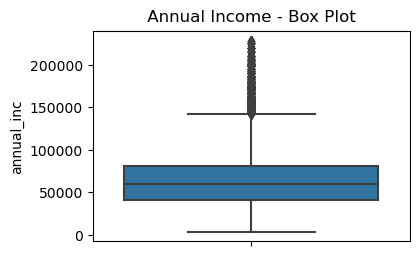

In [1443]:
plt.figure(figsize=[9.0,6.0],dpi=100,edgecolor='y',frameon=True)
plt.subplot(221)
sns.boxplot(data=df_loan_annual_inc, y='annual_inc')
title_1 = ' Annual Income - Box Plot '
plt.title(title_1,pad=7)

### 4.3 int_rate (Continious Univariate Analysis)¶

Text(0.5, 1.0, ' Interest rate - Box Plot ')

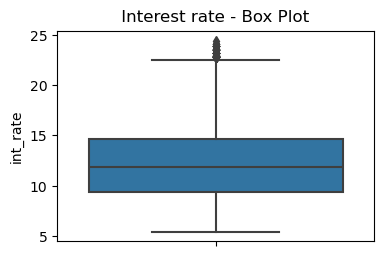

In [1444]:
plt.figure(figsize=[9.0,6.0],dpi=100,edgecolor='y',frameon=True)
plt.subplot(221)
sns.boxplot(data=cleanData, y='int_rate')
title_1 = ' Interest rate - Box Plot '
plt.title(title_1,pad=7)

### 4.4 DTI (Continious Univariate Analysis)

Text(0.5, 1.0, ' DTI - Box Plot ')

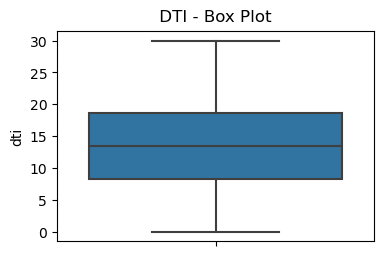

In [1445]:
plt.figure(figsize=[9.0,6.0],dpi=100,edgecolor='y',frameon=True)
plt.subplot(221)
sns.boxplot(data=cleanData, y='dti')
title_1 = ' DTI - Box Plot '
plt.title(title_1,pad=7)

### 4.5 Term (Ordered Categorical Univariate Analysis)

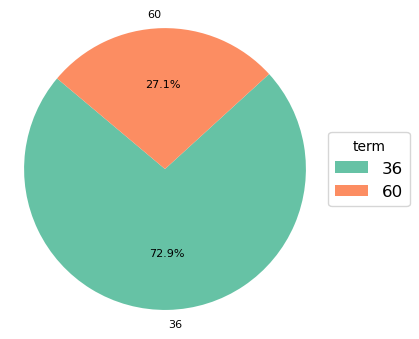

In [1446]:
draw_pie_chart_unique_values(cleanData, 'term')

### 4.6 loan_status (Ordered Categorical Univariate Analysis)

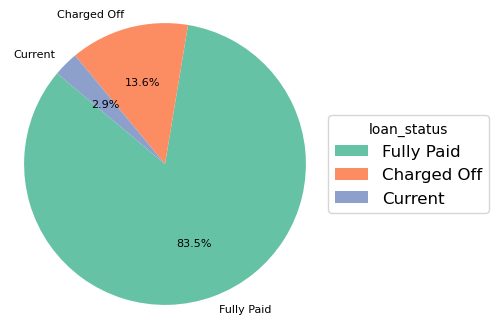

In [1447]:
draw_pie_chart_unique_values(cleanData, 'loan_status')

### 4.7 grade (Ordered Categorical Univariate Analysis)

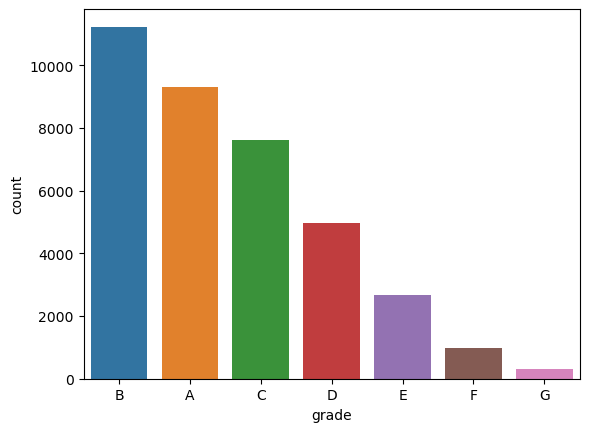

In [1448]:
# Create a count plot for the 'grade' column in the LoanNonNull DataFrame
sns.countplot(x='grade', data=cleanData, order=cleanData['grade'].value_counts().index)

# Display the plot
plt.show()

### 4.7 sub_grade (Ordered Categorical Univariate Analysis)

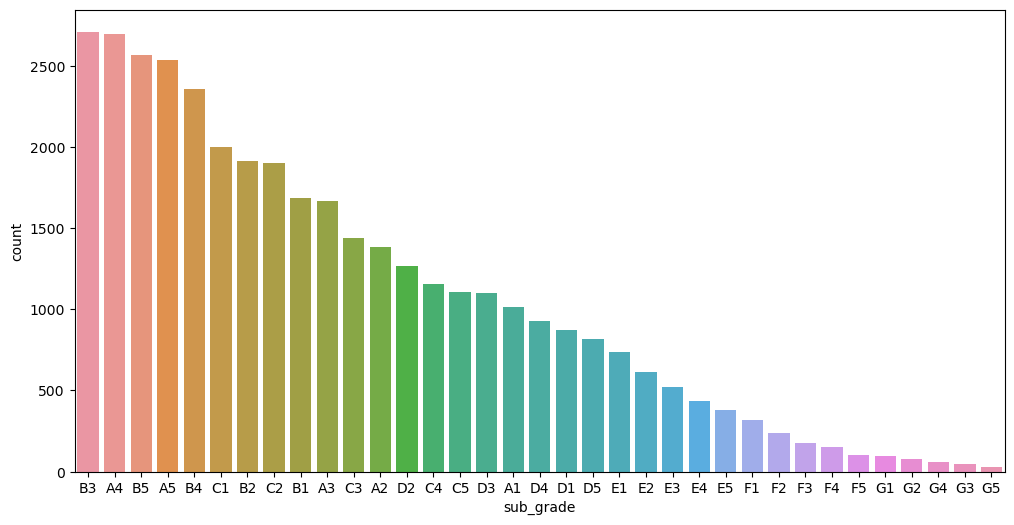

In [1449]:
plt.figure(figsize=(12, 6))

sns.countplot(x='sub_grade', data=cleanData, order=cleanData['sub_grade'].value_counts().index)
plt.show()

### 4.8 home_ownershipe (Unordered Categorical Univariate Analysis)

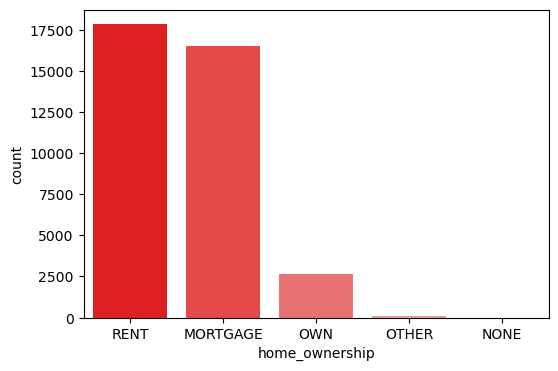

In [1450]:
plt.figure(figsize=(6,4))
sns.countplot(x='home_ownership', data=cleanData, palette = sns.light_palette("red", reverse= True), order=cleanData['home_ownership'].value_counts().index)
plt.show()

### 4.8 verification_status (Unordered Categorical Univariate Analysis)

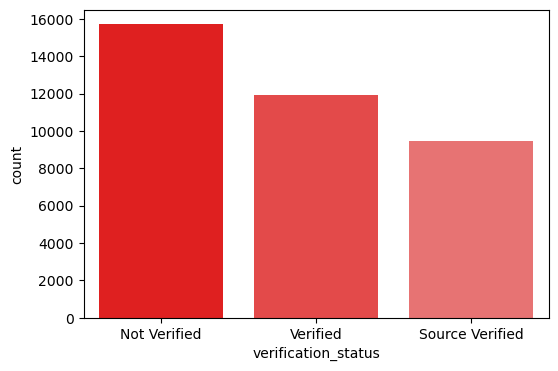

In [1451]:
plt.figure(figsize=(6,4))
sns.countplot(x='verification_status', data=cleanData, palette = sns.light_palette("red", reverse= True), order=cleanData['verification_status'].value_counts().index)
plt.show()

### 4.9 purpose (Unordered Categorical Univariate Analysis)

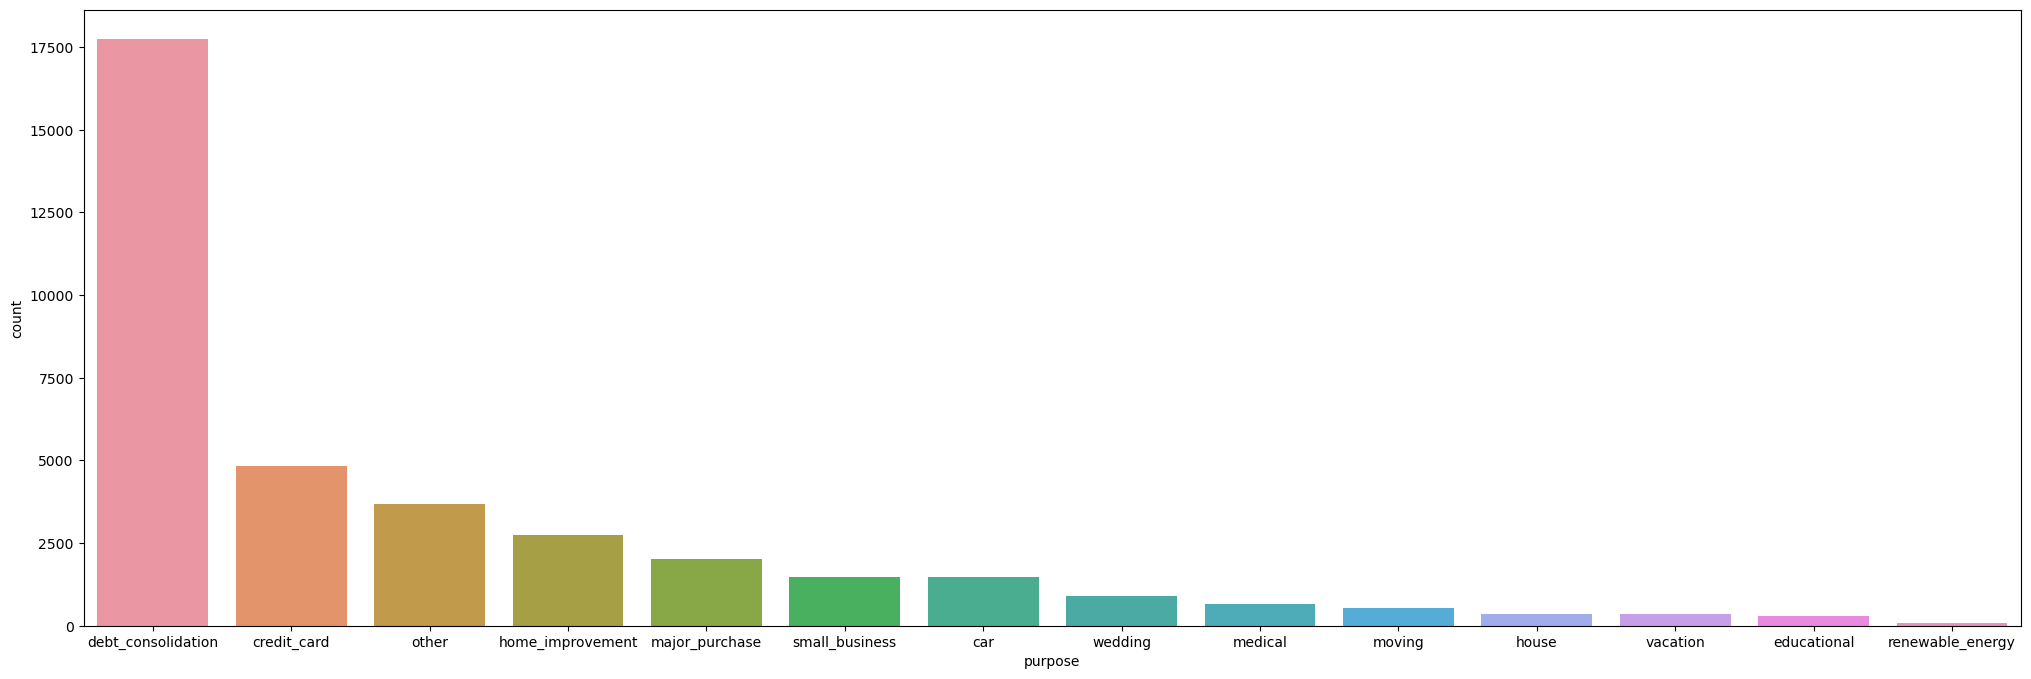

In [1452]:
plt.figure(figsize=(25, 8))

sns.countplot(x='purpose', data=cleanData, order=cleanData['purpose'].value_counts().index)
plt.show()

### 4.10 Observations from Univariate Analysis
- ###### Majority of loans have interest rates 10-15%
- ###### 36 term load is high(73%) compared to 60 month term loan
- ###### 83% fully paid & 13.5% charged off(defaulted)
- ###### High grades are give more loans
- ###### High sub grades are given more loans
- ###### debt_consolidation and credit_card are the major purpose of loan 

## 5. Segemented Univariate Analysis

##### created bins for following columns
- annual_inc
- funded_amnt
- int_rate
- dti
##### Segmented default(in percentage) against following columns
- binned_dti 
- binned_int_rate
- term
- grade
- pub_rec_bankruptcies
- purpose
- sub_grade
- annual_inc_binned
- pub_rec_bankruptcies


### 5.1 Issue Year (Segemented Univariate Analysis)


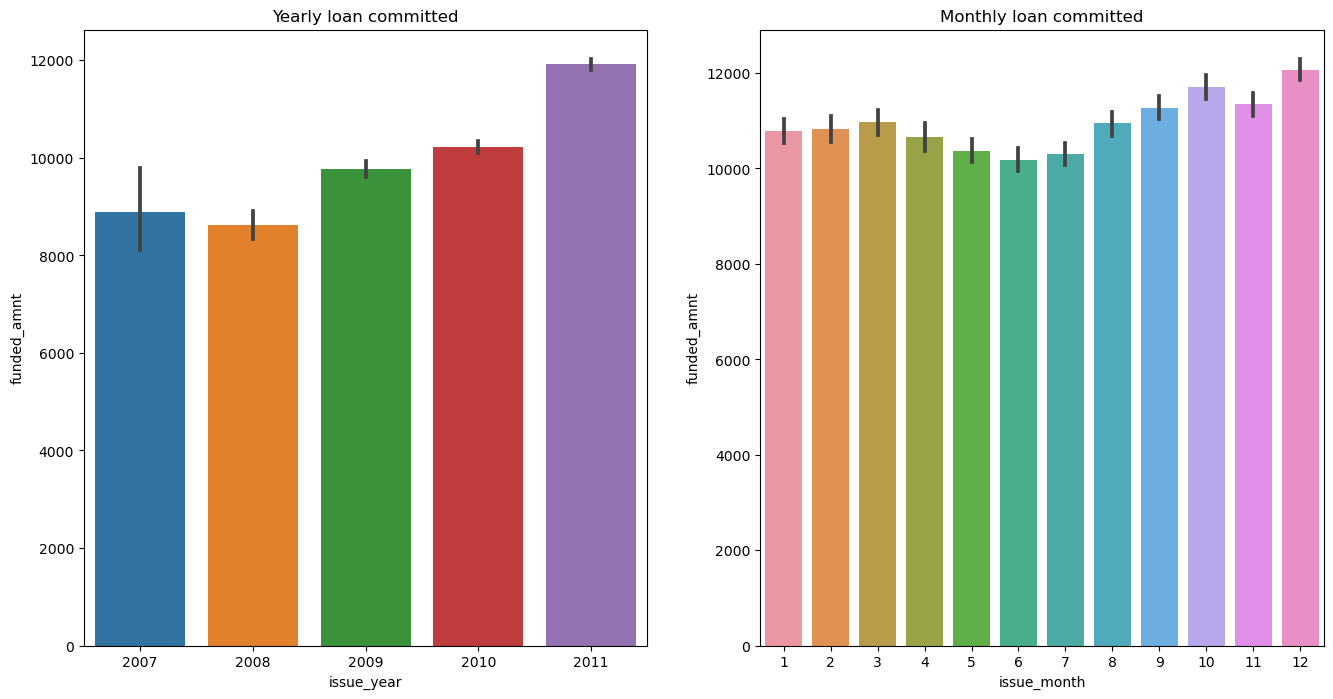

In [1453]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
sns.barplot(x = "issue_year", y = "funded_amnt", data= cleanData)
plt.title("Yearly loan committed")

plt.subplot(1,2,2)
sns.barplot(x = "issue_month", y = "funded_amnt", data=cleanData)
plt.title("Monthly loan committed")

plt.show()

### 5.2 Creating bins for segmentation

In [1454]:
cleanData['int_rate'].describe()

count   37087.00
mean       12.05
std         3.72
min         5.42
25%         9.32
50%        11.86
75%        14.59
max        24.40
Name: int_rate, dtype: float64

In [1455]:
bins = list(range(0,30,5))
cleanData['binned_int_rate'] = pd.cut(cleanData['int_rate'], bins)
bins = list(range(0,32,4))
cleanData['binned_dti'] = pd.cut(cleanData['dti'], bins)

In [1456]:
cleanData.annual_inc.describe()

count     37087.00
mean      69308.44
std       64231.79
min        4000.00
25%       41676.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [1457]:
cleanData['annual_inc_binned'] = pd.qcut(cleanData['annual_inc'], q=8, precision=0)
cleanData['funded_amnt_binned'] = pd.qcut(cleanData['funded_amnt'], q=8, precision=0)

In [1458]:
df_chargedoff = cleanData[cleanData.loan_status == 'Charged Off'] 

In [1459]:
# Suppress the FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def perform_univariate_analysis(column, orientation, chart_title):
    # Set up the figure size
    fig = plt.figure(figsize=(12, 5))
    # Set the title of the chart
    plt.title(label=chart_title)
    
    # Calculate the default Percentage
    default_percentage = (df_chargedoff[column].value_counts() / cleanData[column].value_counts()*100).to_frame(name='default_percentage').rename_axis(column).reset_index()
    
    # Create the bar plot based on the orientation
    if orientation == 'v':        
        sns.barplot(x=column, y='default_percentage', data=default_percentage)
    else:
        sns.barplot(y=column, x='default_percentage', data=default_percentage, orient='h')
    
    # Display the plot
    plt.show()

### 5.3 binned_dti  vs Default percentage

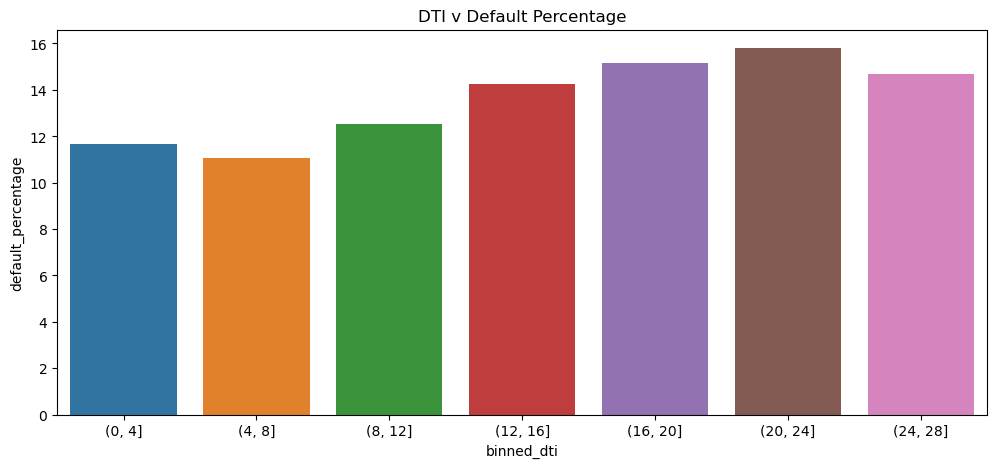

In [1460]:
perform_univariate_analysis('binned_dti','v','DTI v Default Percentage')

### 5.4 binned_int_rate  vs Default percentage

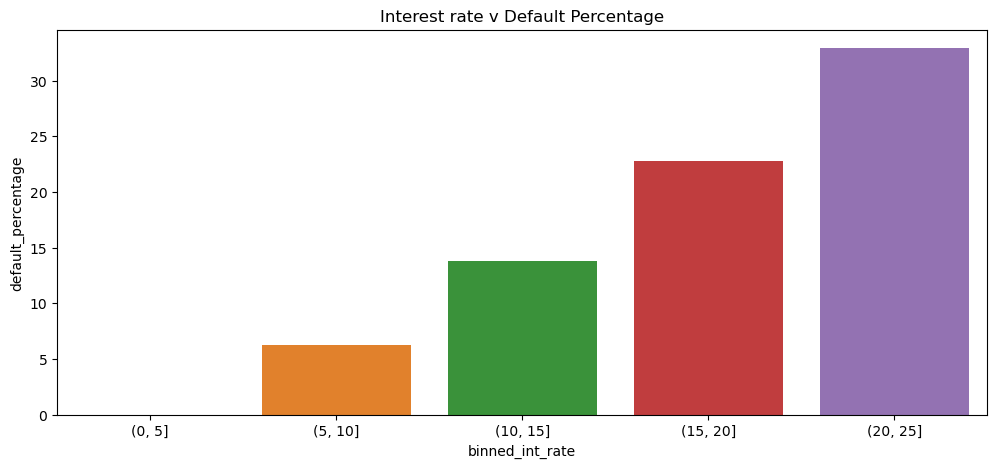

In [1461]:
perform_univariate_analysis('binned_int_rate','v','Interest rate v Default Percentage')

###  5.5 term vs Default percentage

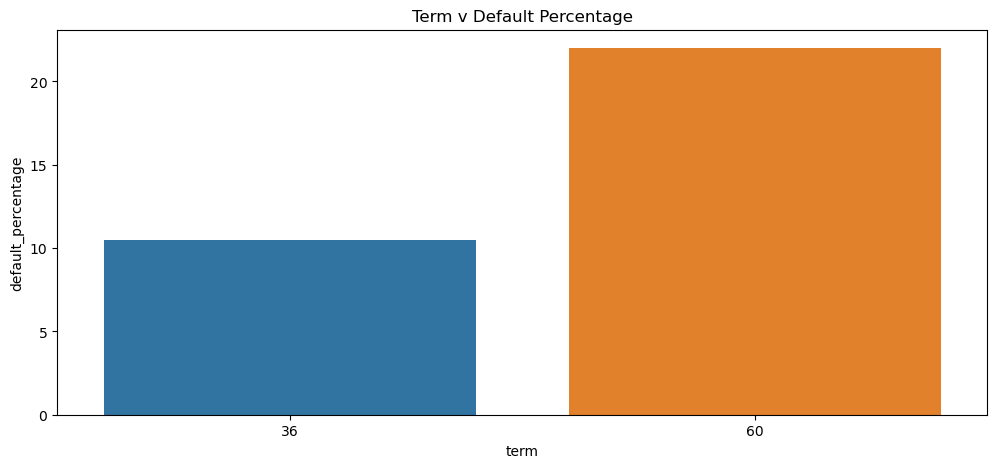

In [1462]:
perform_univariate_analysis('term','v','Term v Default Percentage')

###  5.6 grade vs Default percentage

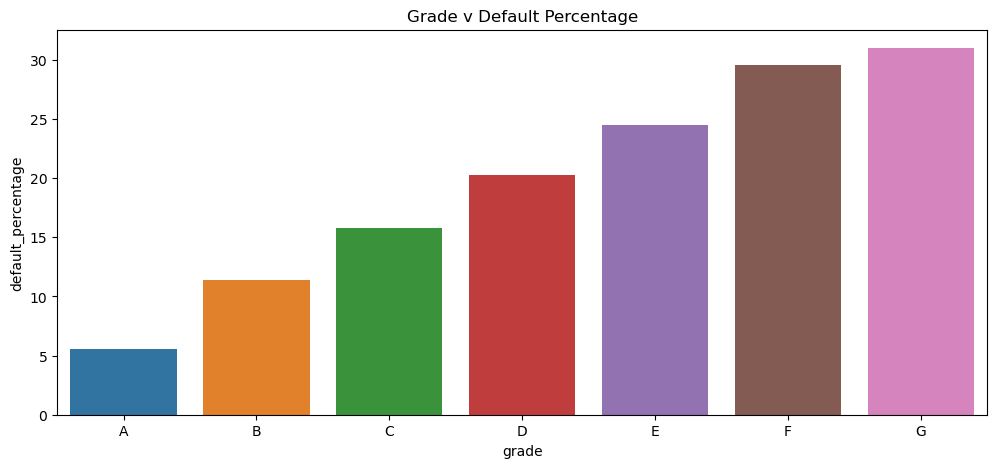

In [1463]:
perform_univariate_analysis('grade','v','Grade v Default Percentage')

###  5.7 pub_rec_bankruptcies vs Default percentage

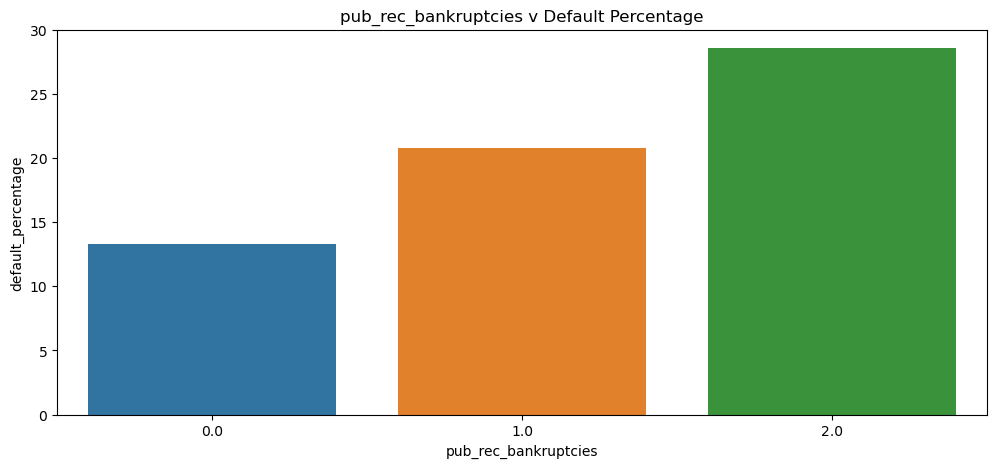

In [1464]:
perform_univariate_analysis('pub_rec_bankruptcies','v','pub_rec_bankruptcies v Default Percentage')

###  5.8 purpose vs Default percentage

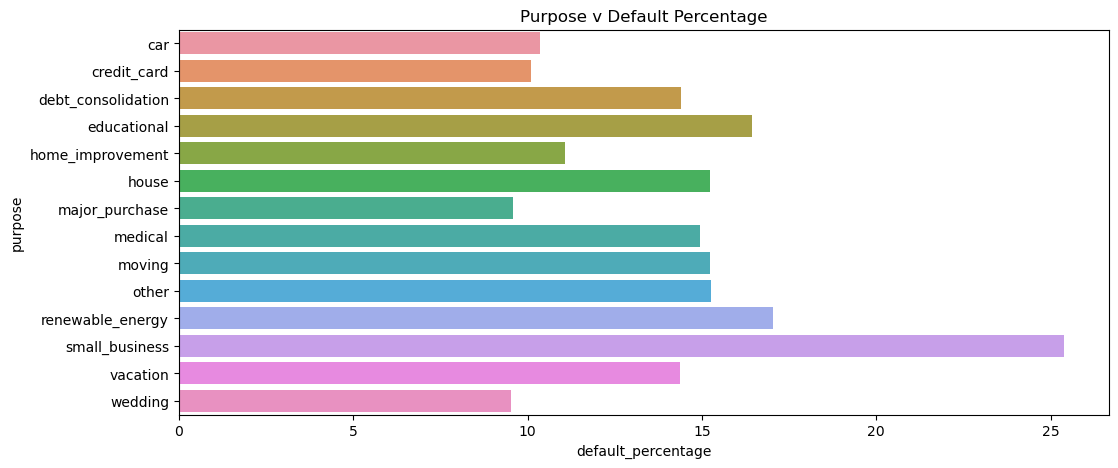

In [1465]:
perform_univariate_analysis('purpose','h','Purpose v Default Percentage')

###  5.9 sub_grade vs Default percentage

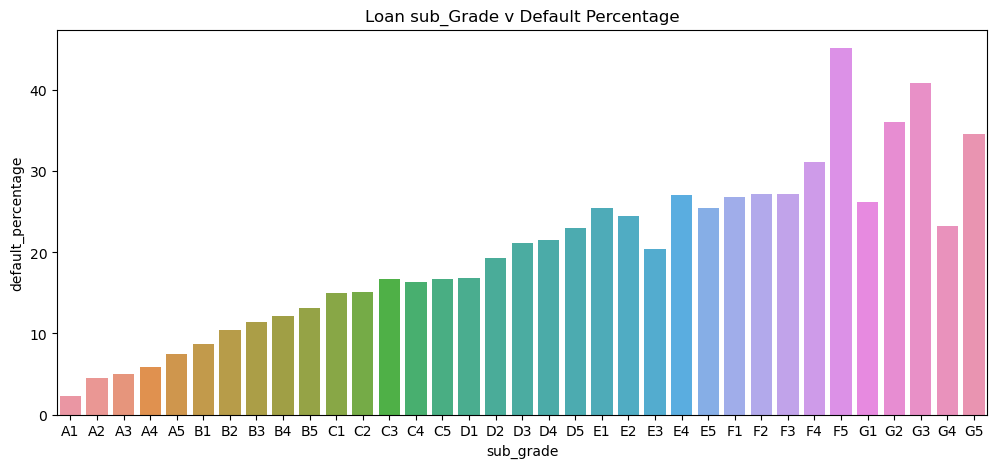

In [1466]:
perform_univariate_analysis('sub_grade','v' ,"Loan sub_Grade v Default Percentage")

###  5.10 annual_inc_binned vs Default percentage

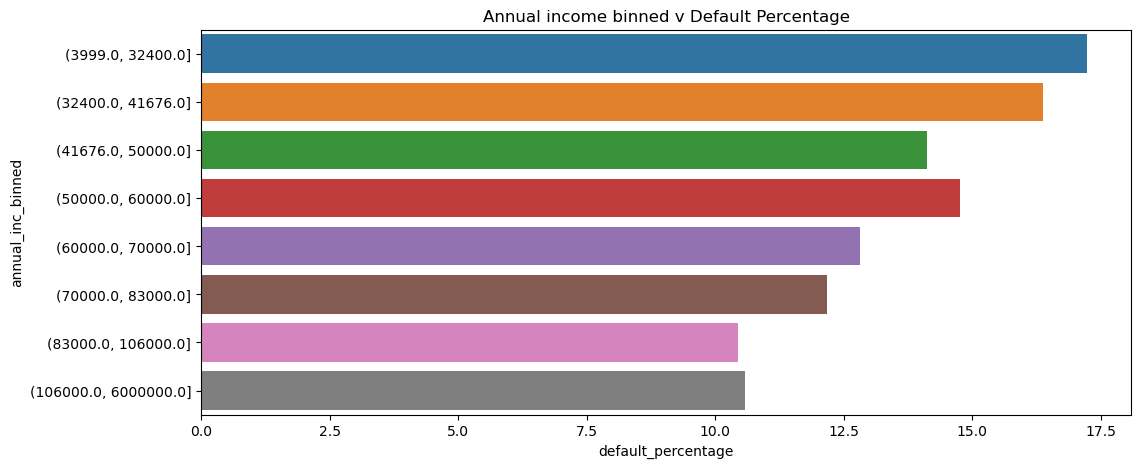

In [1467]:
perform_univariate_analysis('annual_inc_binned','h','Annual income binned v Default Percentage')

### 5.11 Observations from Segmented Univariate Analysis
- ###### loans increase from every year from 2007 to 2011
- ###### higher dti bins have higher default percentage
- ###### higher interest rates have higher defalut percentage
- ###### 60 month term has high default percentage than 36 term loans
- ###### members with public record backruptcies have high default percentages
- ###### small business have higher default percentage than any other purpose 
- ###### members with public record backruptcies have high default percentages
- ###### lower annual income bins have higher default percentages
- ###### default percentage increases as grade increases from A to G
- ###### default percentage increases as grade increases from A1 to G5

## 6. Bivariate Analysis

### 6.1 HeatMap

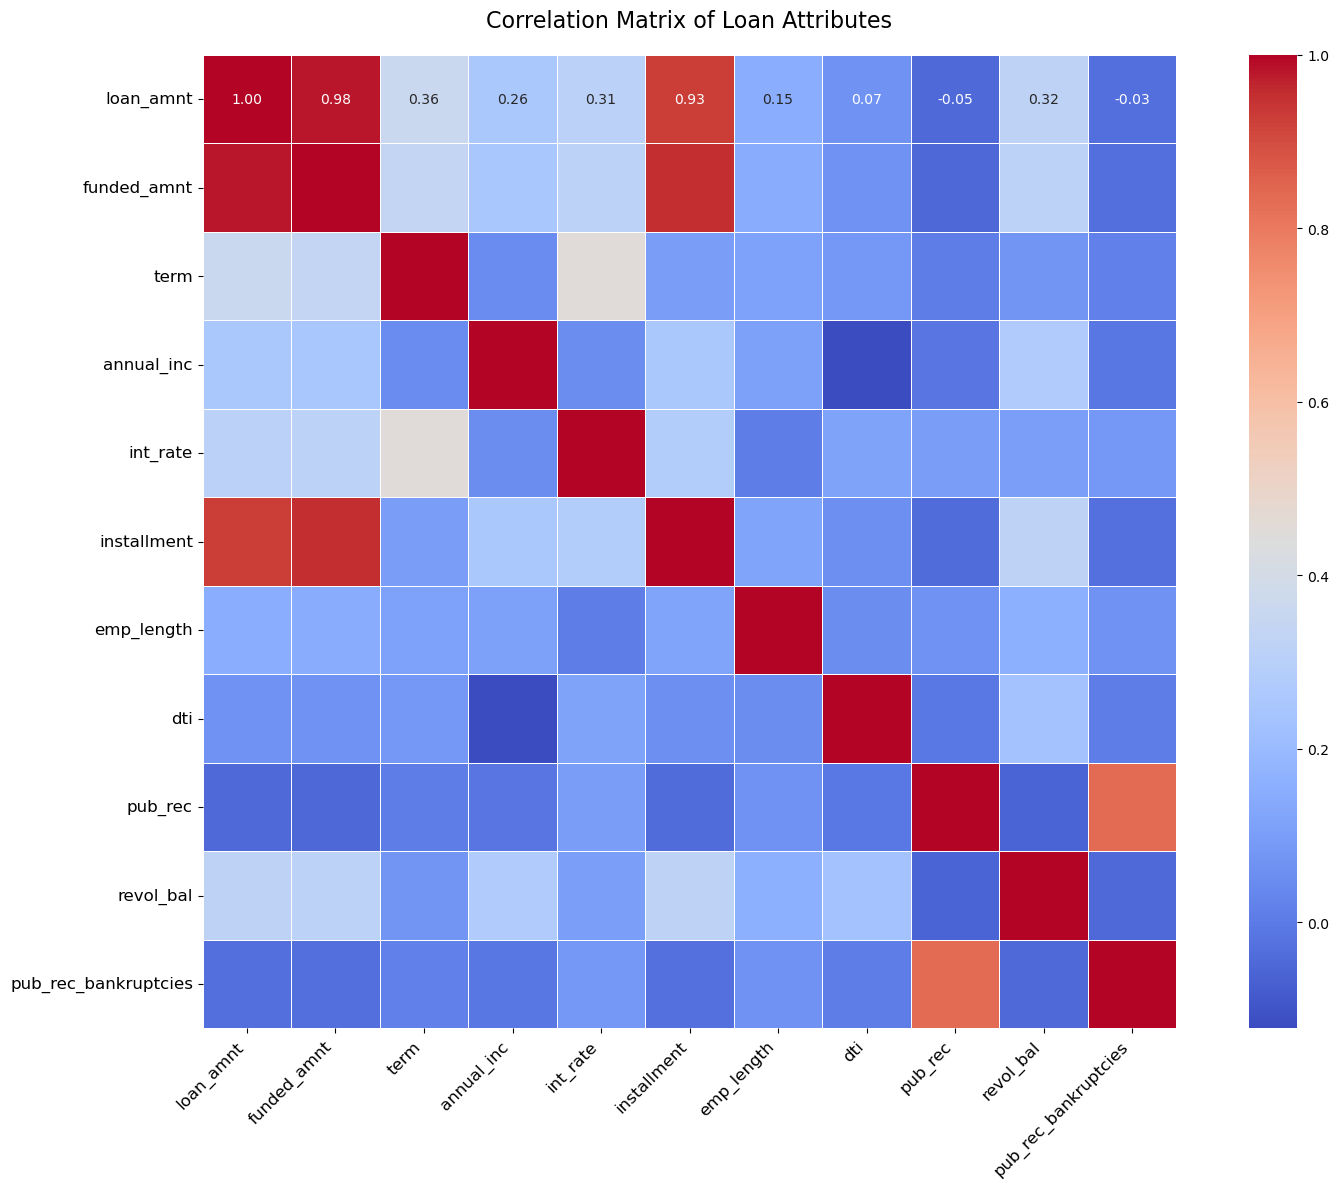

In [1469]:
loan_numeric = cleanData[["loan_amnt", "funded_amnt", "term", "annual_inc", "int_rate", "installment", 
                          "emp_length", "dti", "pub_rec", "revol_bal","pub_rec_bankruptcies"]]

# Compute the correlation matrix
cor = loan_numeric.corr()

# Create a figure with a larger size
plt.figure(figsize=(16, 12))

# Create a heatmap with a more visually appealing colormap and annotations
sns.heatmap(cor, cmap="coolwarm", annot=True, annot_kws={"size": 10}, fmt=".2f", linewidths=.5, square=True)

# Add labels and title for better readability
plt.title('Correlation Matrix of Loan Attributes', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Show the plot
plt.show()

### 6.2 Grade, Interest rate & Loan status

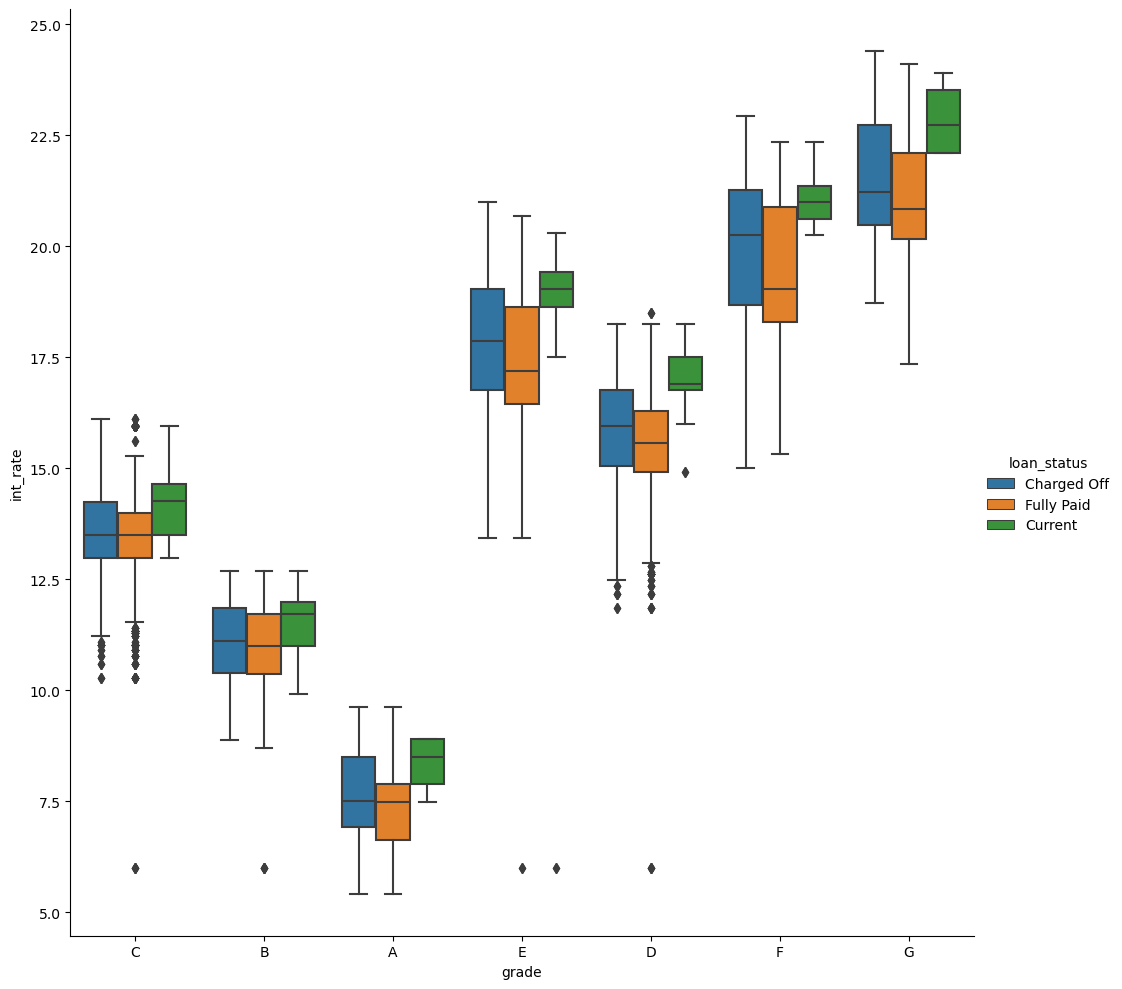

In [1470]:
sns.catplot(x="grade", y="int_rate",hue="loan_status", kind="box", data=cleanData,height=10, aspect=1)
plt.show()

### 6.3 Defaulted loans vs Purpose

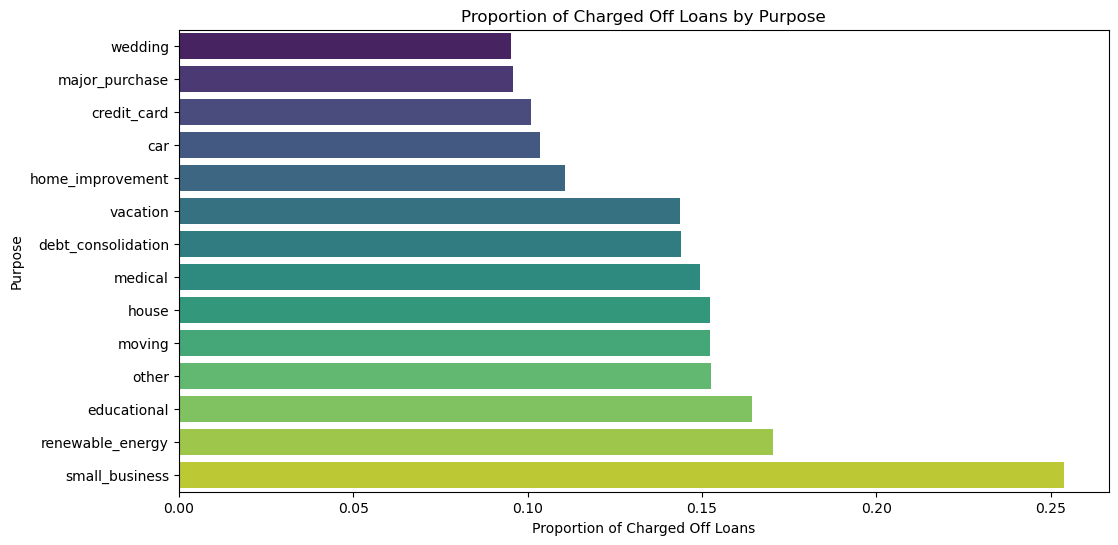

In [1471]:
# Assuming 'cleanData' is your DataFrame and it contains the columns 'purpose' and 'loan_status'

# Calculate the proportion of "Charged Off" loans for each purpose
charged_off_proportions = cleanData.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:, 'Charged Off'].sort_values()

# Convert the Series to a DataFrame for easier plotting
charged_off_df = charged_off_proportions.reset_index(name='proportion')

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='proportion', y='purpose', data=charged_off_df, palette='viridis')

# Add labels and title
plt.xlabel('Proportion of Charged Off Loans')
plt.ylabel('Purpose')
plt.title('Proportion of Charged Off Loans by Purpose')

# Display the plot
plt.show()

In [1472]:
# Bivariate function to plot the graphs for categorical variables based on the parameters provided        
# Taking out Total loan status count for the columns 'category1' and 'category2'
def bivariate_cat(df_loan, catone, cattwo, x_label, title1, fig_size):
    # Ensure that the input DataFrame and columns are valid
    if not isinstance(df_loan, pd.DataFrame):
        raise ValueError("The input data must be a pandas DataFrame.")
    if catone not in df_loan.columns or cattwo not in df_loan.columns:
        raise ValueError(f"Columns {catone} and {cattwo} must be present in the DataFrame.")
    
    # Convert columns to strings to avoid potential type issues
    df_loan[catone] = df_loan[catone].astype(str)
    df_loan[cattwo] = df_loan[cattwo].astype(str)

    # Filter the DataFrame for 'Charged Off' loan status
    default_loan = df_loan[df_loan['loan_status'] == 'Charged Off'] \
        .groupby(by=[catone, cattwo])['loan_status'].count() \
        .rename('Default_count').sort_values(ascending=False).reset_index()

    # Calculate the total loan status count
    loan_total1 = df_loan.groupby(by=[catone, cattwo])['loan_status'].count() \
        .rename('Total_count').sort_values(ascending=False).reset_index()

    # Merge the dataframes to calculate the default percentage
    merge_loan_df = pd.merge(loan_total1, default_loan, how='left', on=[catone, cattwo])
    merge_loan_df['Default_count'] = merge_loan_df['Default_count'].fillna(0)  # Handle cases where there are no defaults
    merge_loan_df['default_percentage'] = round(merge_loan_df['Default_count'] / merge_loan_df['Total_count'] * 100, 2)

    # Plotting
    plt.figure(figsize=fig_size, dpi=120, frameon=True)
    sns.barplot(x=catone, y='default_percentage', hue=cattwo, data=merge_loan_df)
    plt.ylabel("Default Percentage")
    plt.xlabel(x_label)
    plt.title(title1)
    plt.show()

In [1473]:

plt.figure(figsize=[0,6])
bins = list(range(0,300000,10000))

cleanData['binned_loan_amount'] = pd.cut(cleanData['loan_amnt'], bins)

<Figure size 0x600 with 0 Axes>

### 6.4 Term, Grade, Default Percentage

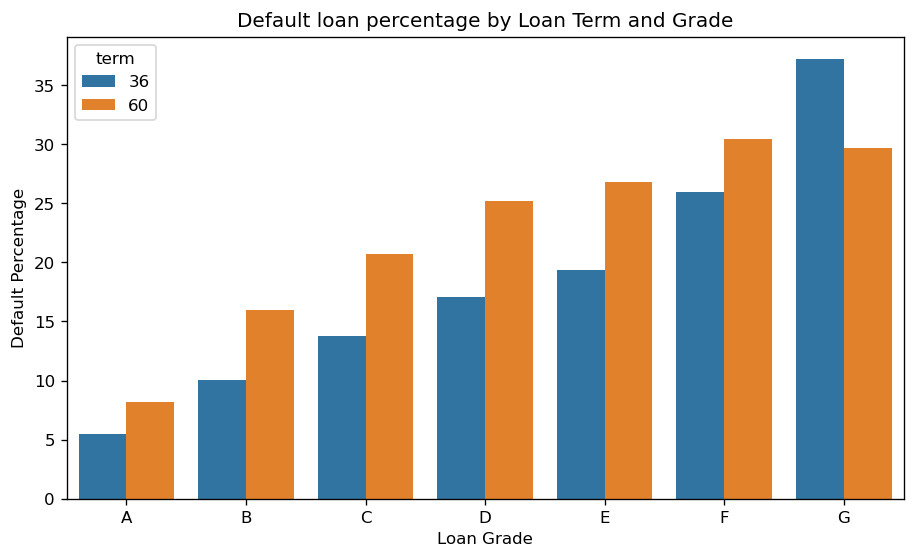

In [1474]:
bivariate_cat(cleanData,'grade','term', "Loan Grade", "Default loan percentage by Loan Term and Grade" , [9.0,5.0] )

### 6.5 annual_inc_binned, funded_amnt_binned, Default Percentage

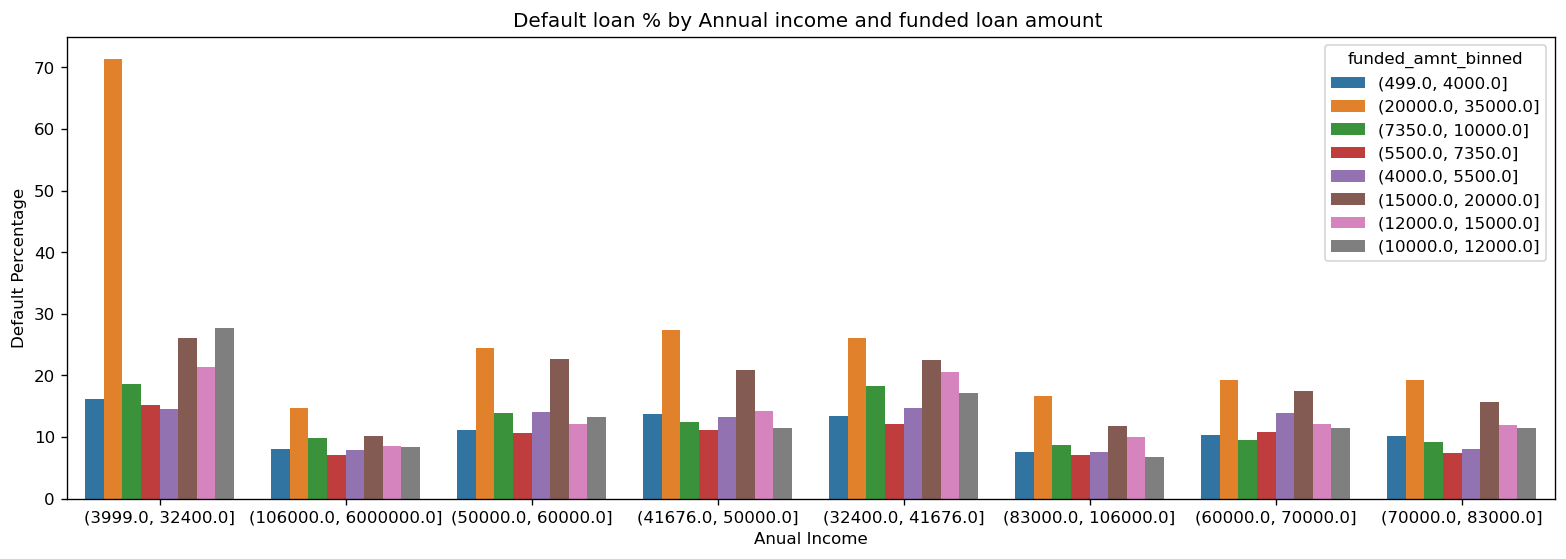

In [1475]:
bivariate_cat(cleanData, 'annual_inc_binned','funded_amnt_binned', "Anual Income", 
                      "Default loan % by Annual income and funded loan amount ", [16.0,5.0])

### 6.6 binned_loan_amount, binned_dti, Default Percentage

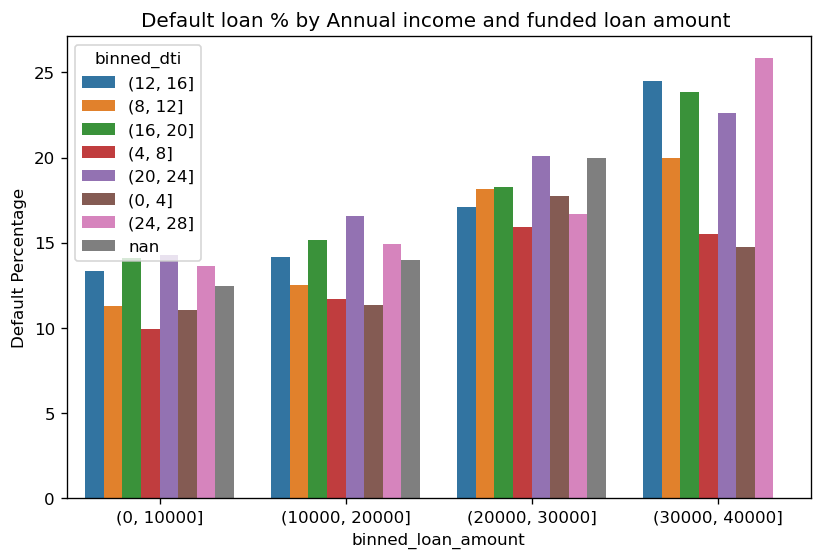

In [1476]:
bivariate_cat(cleanData, 'binned_loan_amount','binned_dti', "binned_loan_amount", 
                      "Default loan % by Annual income and funded loan amount ", [8.0,5.0])

### 6.7 issue_year, binned_loan_amount, Default Percentage

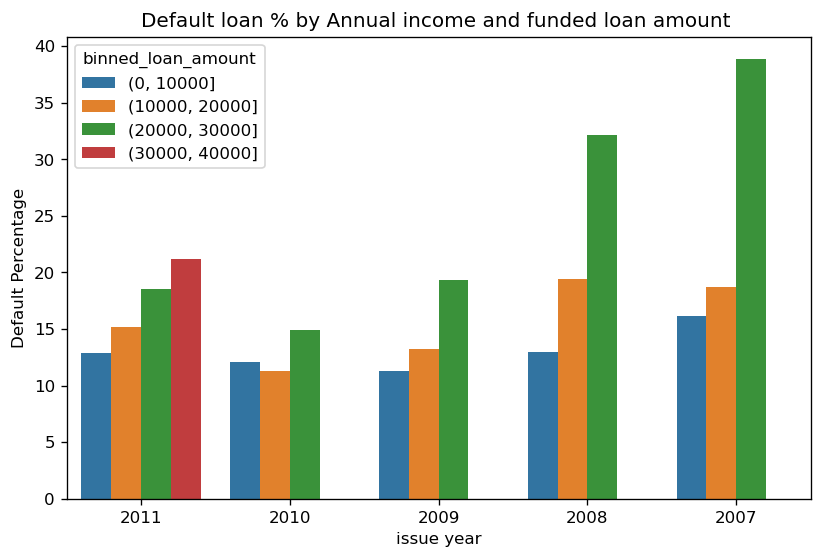

In [1481]:
bivariate_cat(cleanData, 'issue_year','binned_loan_amount', "issue year", 
                      "Default loan % by Annual income and funded loan amount ", [8.0,5.0])

### 6.8 addr_state, purpose, Default Percentage

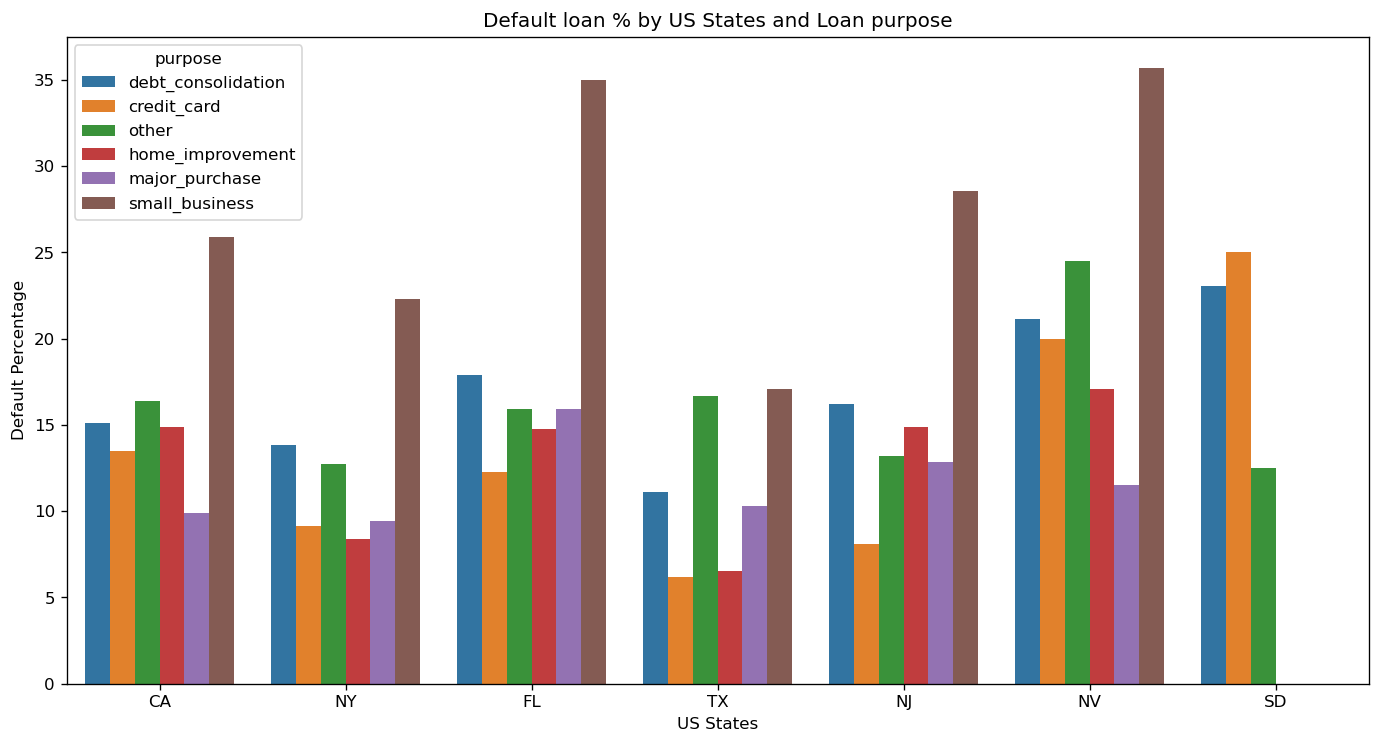

In [1478]:
df_loan_state = cleanData[cleanData["addr_state"].isin(["CA", "NY", "FL", "TX", "NJ", "NV", "SD"]) ]
df_loan_state = df_loan_state[df_loan_state["purpose"].isin(["debt_consolidation", "credit_card", 
                                              "home_improvement", "major_purchase", "small_business","other"]) ]
bivariate_cat(df_loan_state, 'addr_state','purpose', "US States", 
                      "Default loan % by US States and Loan purpose", [14,7.0])

### 6.9 pub_rec_bankruptcies, annual_inc_binned, Default Percentage

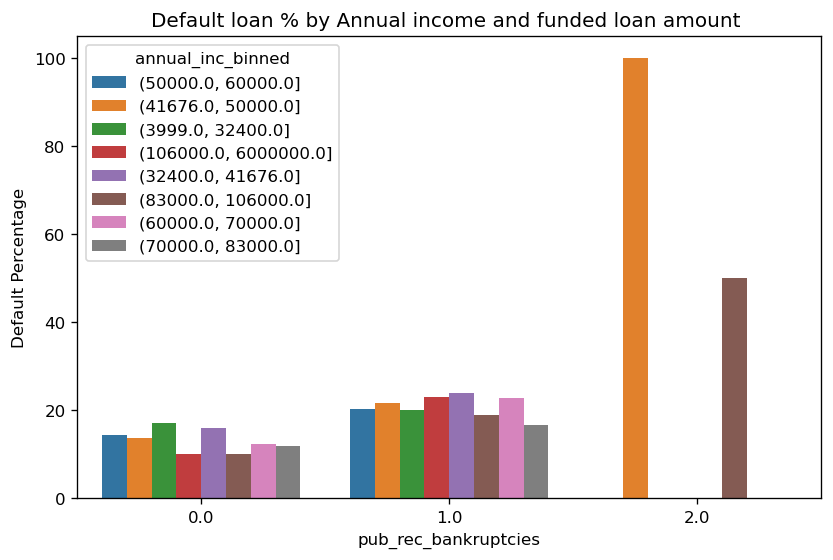

In [1479]:
bivariate_cat(cleanData, 'pub_rec_bankruptcies','annual_inc_binned', "pub_rec_bankruptcies", 
                      "Default loan % by Annual income and funded loan amount ", [8.0,5.0])

### 6.10 pub_rec_bankruptcies, binned_loan_amount, Default Percentage

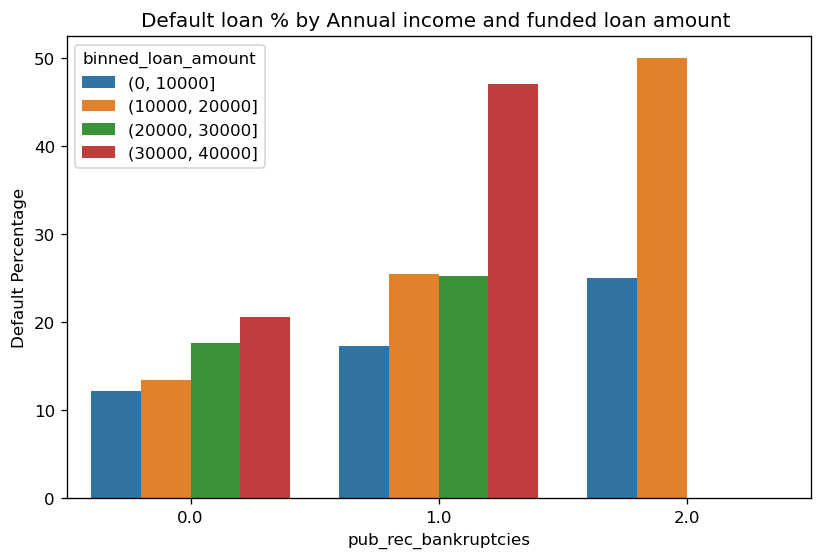

In [1480]:
bivariate_cat(cleanData, 'pub_rec_bankruptcies','binned_loan_amount', "pub_rec_bankruptcies", 
                      "Default loan % by Annual income and funded loan amount ", [8.0,5.0])

### 6.11 Observations from Bivariate analysis
- ###### Default percentage is high with respect to lower loan term G,F,E
- ###### Grade C and D with term of 36 months are likely to repay(compared to 60 months loan term)
- ###### Loan default ratio of Grade A and B are irrespective of loan terms
- ###### Customers with Public bankruptcy record or Public derogatory records are more likely to default
- ###### If funded loan amount is above 20,000 USD for customer with < 30,000 USD annual income, they are most likely to default
- ###### Members with higher dti and high loan amount(>30,000 USD) are likely to default
- ###### Small business are likely to default across any region

## 7 Conclusion
### Based on the observation above following are major driving factors
- ##### grade
- ##### sub_grade
- ##### purpose
- ##### loan amount
- ##### annual income
- ##### Public bankruptcy record